In [28]:
import numpy as np
import pandas as pd
import re,os,sys
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

In [29]:
metaphlan = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.3/normal/abundance_matrix/normal_abundance_matrix.txt",sep='\t',index_col=0)
l_subtype_m = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.3/normal/abundance_matrix/normal_lacto_subtype_abundance_matrix.txt",sep='\t',index_col=0)

In [30]:
bifido = metaphlan.loc[metaphlan.index.str.contains("Bifidobacterium"),:]
lacto = metaphlan.loc[metaphlan.index.str.contains("Lactobacillus"),:]

In [31]:
prevalence = lambda x : (sum(x > 0) / len(x)) * 100
bifido_pv = bifido.apply(prevalence,axis=1)
bifido_mean = bifido.mean(axis=1)
lacto_pv = lacto.apply(prevalence,axis=1)
lacto_mean = lacto.mean(axis=1)

In [32]:
bifido_plot_df = pd.DataFrame({'Prevalence' : bifido_pv.values,'Mean relative abundance' : bifido_mean.values},index=[x[3:] for x in bifido.index])
lacto_plot_df = pd.DataFrame({'Prevalence' : lacto_pv.values,'Mean relative abundance' : lacto_mean.values},index = [x[3:] for x in lacto.index])
#remove l.rogosae from lactobacillus matrix
lacto_plot_df.drop("Lactobacillus_rogosae",axis=0,inplace=True)
lacto_subtype_df = pd.DataFrame({'Prevalence' : l_subtype_m.apply(prevalence,axis=1).values,
                                 'Mean relative abundance' : l_subtype_m.mean(axis=1).values},index = l_subtype_m.index)

In [6]:
path = os.path.abspath("/home/bruce1996/repo/Microbiome_health_indicator/manuscript/")
sys.path.append(path)
from subtype import *

In [7]:
def subtype_to_species(subtype_dict) :
    """
    this function aim to convert subtype dictionary into dataframe
    subtype_dict (dict): key is name of subtype, value is list of species in this subtype
    """    
    subtype_list = []
    species_list = []
    for subtype in subtype_dict.keys() :
        n_species = len(subtype_dict[subtype])
        subtype_list += ([subtype] * n_species)
        species_list += [x[3:] for x in subtype_dict[subtype]]

    subtype_df = pd.DataFrame({'Subtype' : subtype_list,'Species' : species_list})
    
    return subtype_df

In [8]:
subtype_reference = pd.read_csv("/home/bruce1996/data/MCI/subtyping/Lactobacillus_group.csv")
subtype_matrix,subtype_d = metaphlan_subtype(lacto,subtype_reference,'Lactobacillus','species','phylogroup')

In [9]:
subtype_list = []
species_list = []
for subtype in subtype_d.keys() :
    n_species = len(subtype_d[subtype])
    subtype_list += ([subtype] * n_species)
    species_list += [x[3:] for x in subtype_d[subtype]]

In [10]:
df = pd.DataFrame({'Species' : [x.replace('_',' ') for x in species_list],'Subtype' : [x.replace('_',' ') for x in subtype_list]})
df.to_csv("/home/bruce1996/data/MCI/subtyping/lacto_subtype.txt",sep='\t',index=None)

In [20]:
table_s1 = pd.DataFrame()
for subtype in subtype_d.keys() :
    if subtype == 'Rogosae_subtype' :
        continue
    tmp = pd.DataFrame({'Prevalence' : lacto_subtype_df.loc[subtype,'Prevalence'],'Mean relative abundance' : lacto_subtype_df.loc[subtype,'Mean relative abundance'] },index=[subtype])
    table_s1 = pd.concat([table_s1,tmp],axis=0)
    species = subtype_d[subtype] 
    species = [ x[3:] for x in species]
    if len(species) == 1 :
        tmp = pd.DataFrame({'Prevalence' : lacto_plot_df.loc[species,'Prevalence'],'Mean relative abundance' : lacto_plot_df.loc[species,'Mean relative abundance'] })
        table_s1 = pd.concat([table_s1,tmp],axis=0)
    else :
        table_s1 = pd.concat([table_s1,lacto_plot_df.loc[species,:]],axis=0)

table_s1['Prevalence'] = table_s1['Prevalence'].round(3)
table_s1.to_csv("/home/bruce1996/data/MCI/manuscript_v3.3/supplement/lacto_and_subtype_pv_abundance.txt",sep='\t')

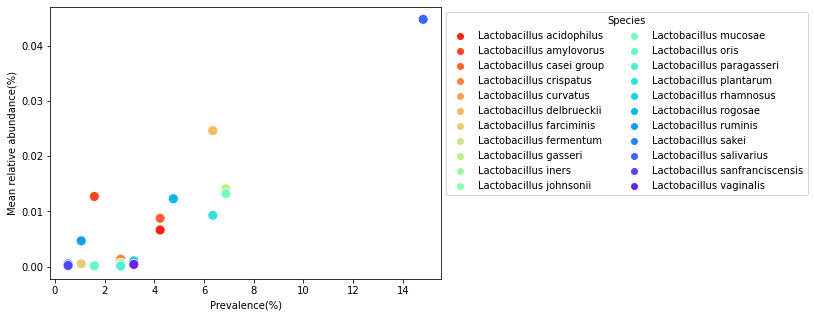

In [36]:
plot_df = lacto_plot_df
sample_idx = list(lacto_plot_df.index[lacto_plot_df['Prevalence'] > 0])
plot_df = lacto_plot_df.loc[sample_idx,:]
plot_df['Species'] = [x.replace('_',' ') for x in plot_df.index]
plt.figure(figsize=(7,5))
sns.scatterplot(data=plot_df,x='Prevalence',y='Mean relative abundance',hue='Species',palette="rainbow_r",s=100)
plt.xlabel("Prevalence(%)")
plt.ylabel("Mean relative abundance(%)")
plt.legend(bbox_to_anchor=[1,1],ncol=2,title="Species")
plt.savefig("/home/bruce1996/data/MCI/manuscript_v3.3/supplement/normal_lacto_prevalence_abundance_scatterplot.png",format='png',dpi=300,bbox_inches='tight')